# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [11]:
# Import your libraries:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [3]:
df = pd.read_csv('../data/website.csv')
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [4]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

df_numerical = df[numerical_columns]
df_categorical = df[categorical_columns]
numerical_columns, categorical_columns, df_numerical.head(), df_categorical.head()


(['URL_LENGTH',
  'NUMBER_SPECIAL_CHARACTERS',
  'CONTENT_LENGTH',
  'TCP_CONVERSATION_EXCHANGE',
  'DIST_REMOTE_TCP_PORT',
  'REMOTE_IPS',
  'APP_BYTES',
  'SOURCE_APP_PACKETS',
  'REMOTE_APP_PACKETS',
  'SOURCE_APP_BYTES',
  'REMOTE_APP_BYTES',
  'APP_PACKETS',
  'DNS_QUERY_TIMES',
  'Type'],
 ['URL',
  'CHARSET',
  'SERVER',
  'WHOIS_COUNTRY',
  'WHOIS_STATEPRO',
  'WHOIS_REGDATE',
  'WHOIS_UPDATED_DATE'],
    URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH  \
 0          16                          7           263.0   
 1          16                          6         15087.0   
 2          16                          6           324.0   
 3          17                          6           162.0   
 4          17                          6        124140.0   
 
    TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
 0                          7                     0           2        700   
 1                         17                     7           4

In [5]:
unique_counts = df_categorical.nunique()

unique_counts


URL                   1781
CHARSET                  8
SERVER                 238
WHOIS_COUNTRY           48
WHOIS_STATEPRO         181
WHOIS_REGDATE          890
WHOIS_UPDATED_DATE     593
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_one_hot = pd.get_dummies(df, columns=["CHARSET"])
label_encode_columns = ["SERVER", "WHOIS_REGDATE", "WHOIS_UPDATED_DATE"]
for column in label_encode_columns:
    df_one_hot[column] = label_encoder.fit_transform(df_one_hot[column])
df_one_hot.head()



,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,...,DNS_QUERY_TIMES,Type,CHARSET_ISO-8859,CHARSET_ISO-8859-1,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252
0,M0_109,16,7,199,263.0,NaN,NaN,59,593,7,...,2.0,1,False,False,False,True,False,False,False,False
1,B0_2314,16,6,61,15087.0,NaN,NaN,890,593,17,...,0.0,0,False,False,True,False,False,False,False,False
2,B0_911,16,6,115,324.0,NaN,NaN,890,593,0,...,0.0,0,False,False,False,False,True,False,False,False
3,B0_113,17,6,199,162.0,US,AK,806,68,31,...,8.0,0,False,True,False,False,False,False,False,False
4,B0_403,17,6,238,124140.0,US,TX,93,42,57,...,4.0,0,False,False,True,False,False,False,False,False


#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

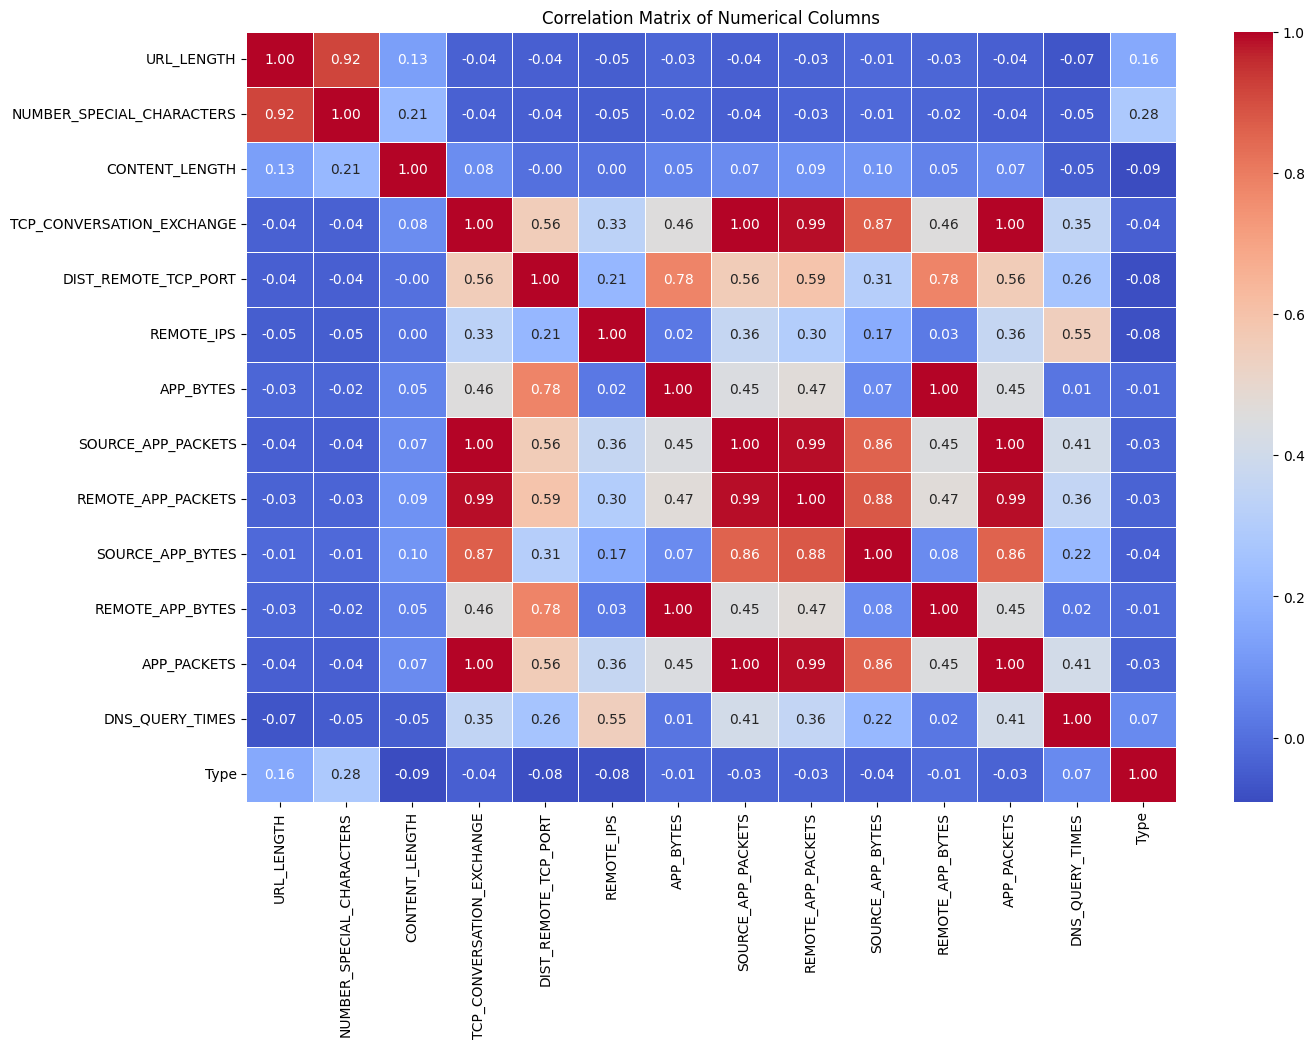

In [12]:
numerical_columns_df = df[numerical_columns]
correlation_matrix = numerical_columns_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


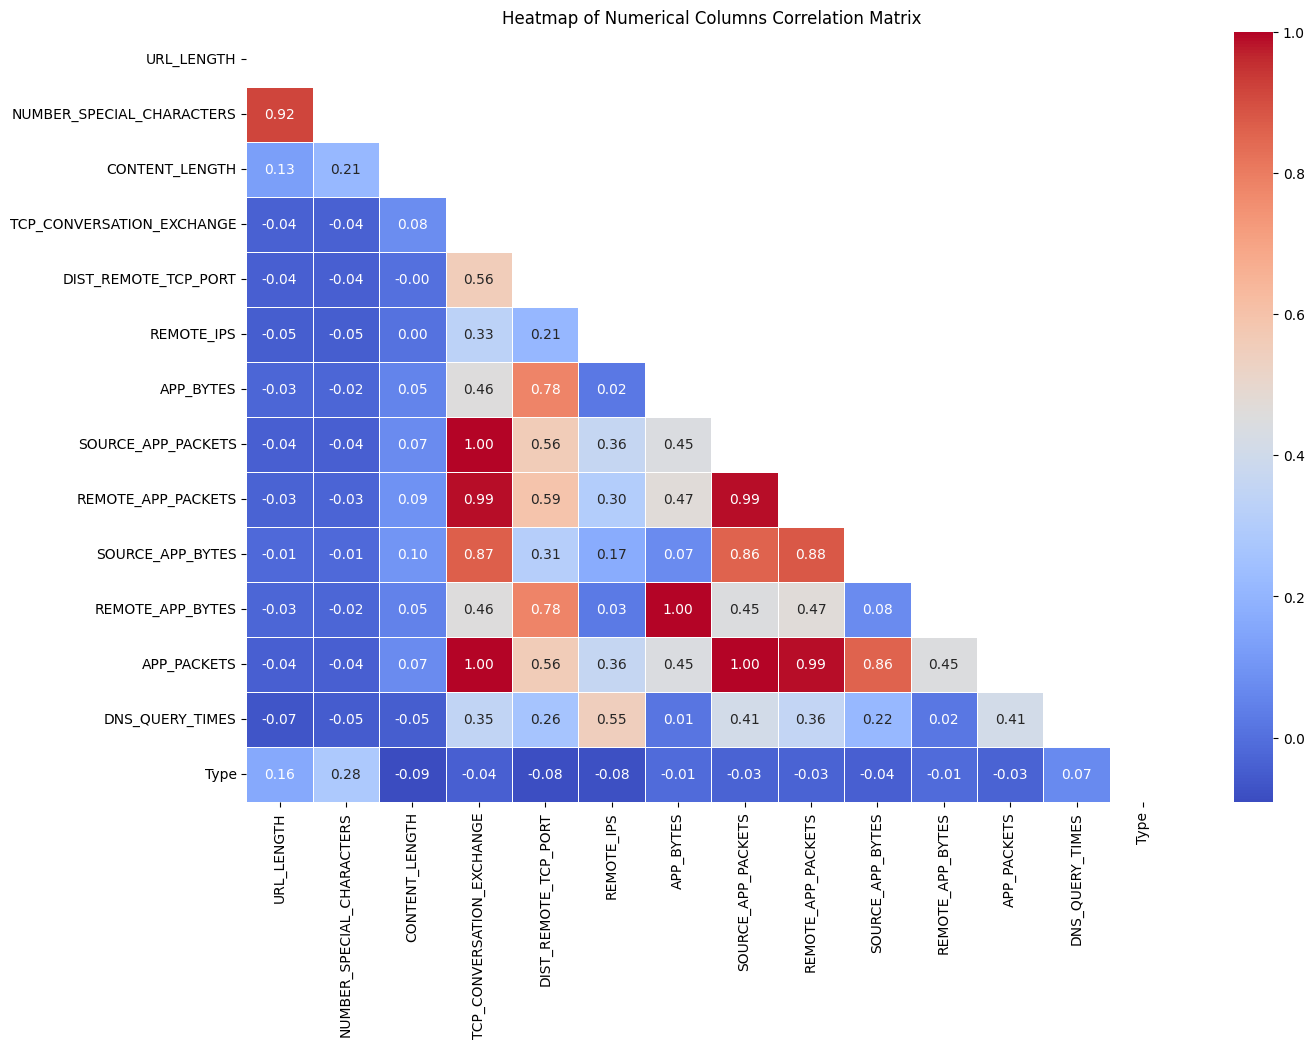

In [13]:
plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, mask=mask)
plt.title('Heatmap of Numerical Columns Correlation Matrix')
plt.show()


In [ ]:
#APP_PACKETS
#APP_BYTES

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

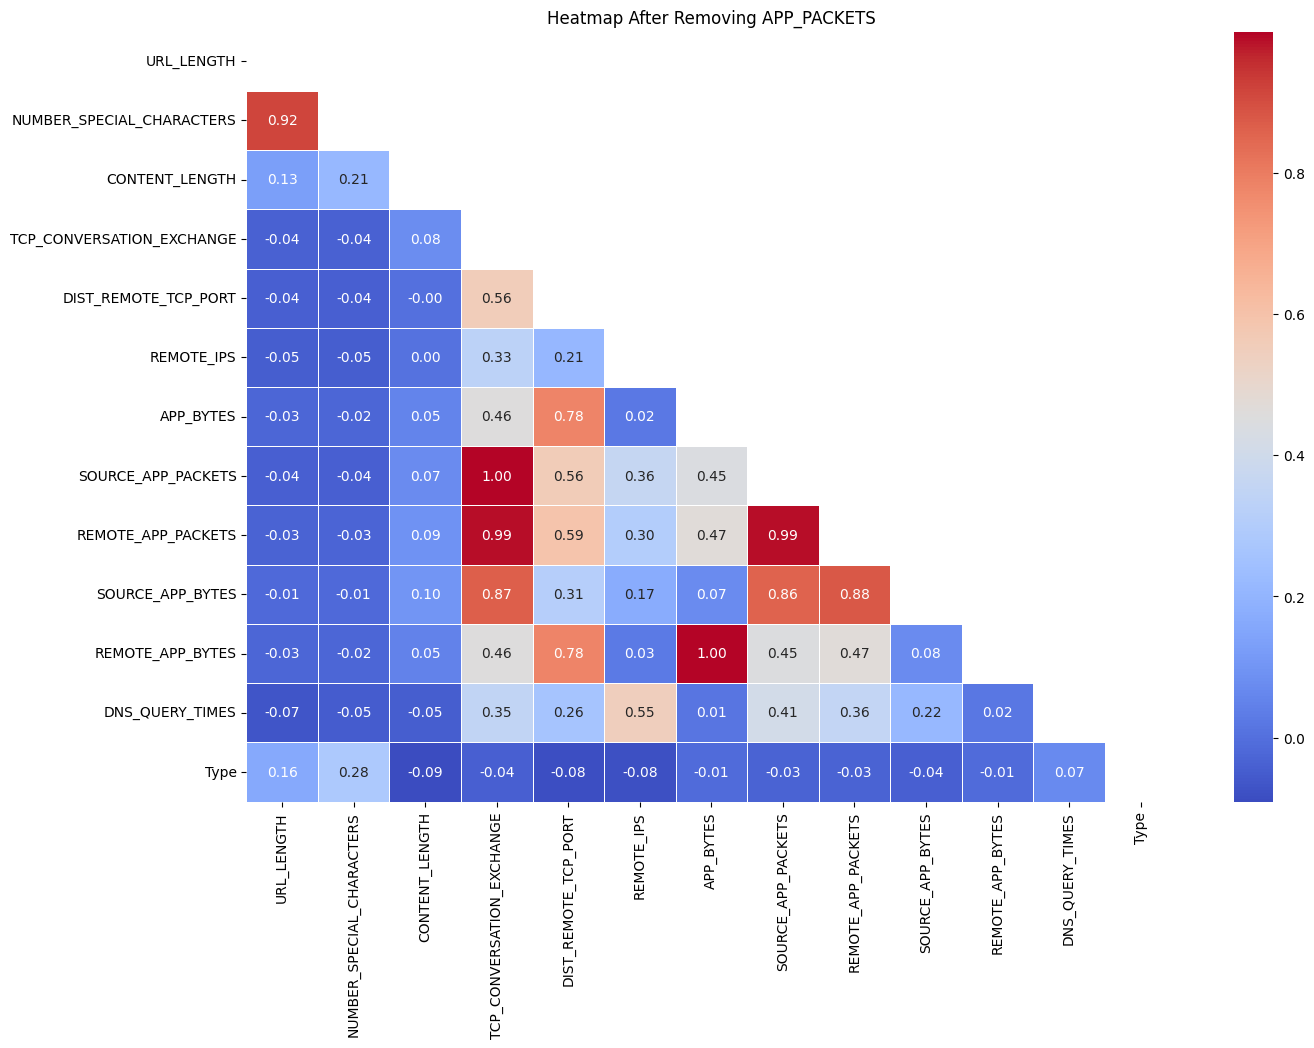

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.215285,-0.043852


In [14]:

df_reduced = numerical_columns_df.drop(columns=['APP_PACKETS'])
correlation_matrix_reduced = df_reduced.corr()

plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(correlation_matrix_reduced, dtype=bool))
sns.heatmap(correlation_matrix_reduced, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, mask=mask)
plt.title('Heatmap After Removing APP_PACKETS')
plt.show()

correlation_matrix_reduced




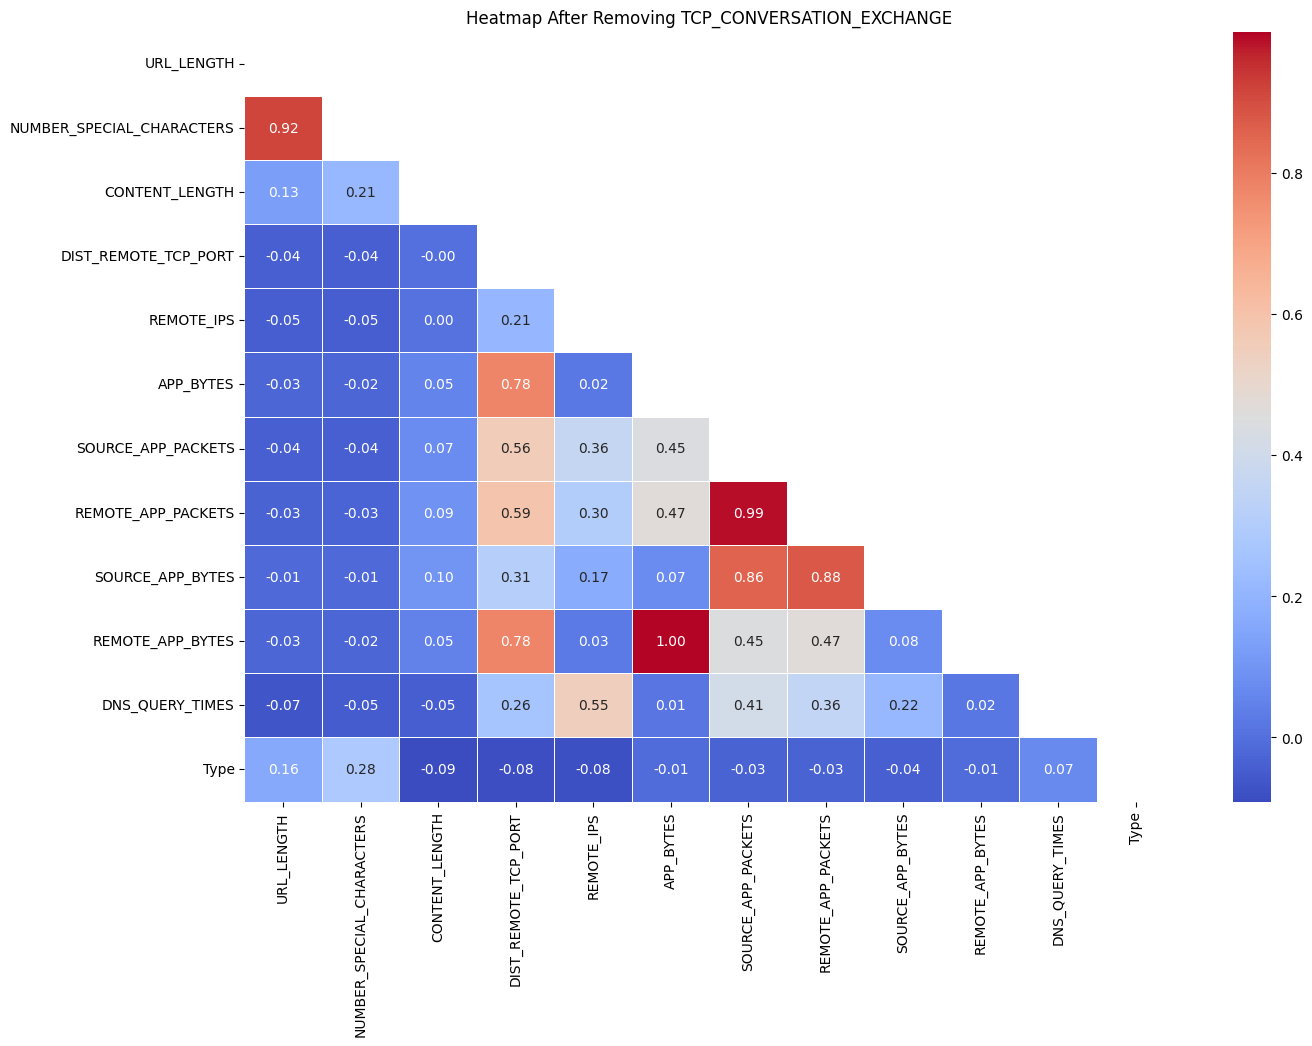

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,-0.045644,-0.090852
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.215285,-0.043852
REMOTE_APP_BYTES,-0.026686,-0.024098,0.047595,0.781212,0.025324,0.999992,0.447448,0.470401,0.075328,1.000000,0.016215,-0.011004


In [15]:
# Remove the highly correlated column TCP_CONVERSATION_EXCHANGE
df_reduced_2 = df_reduced.drop(columns=['TCP_CONVERSATION_EXCHANGE'])

# Generate the new correlation matrix and heatmap
correlation_matrix_reduced_2 = df_reduced_2.corr()

plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(correlation_matrix_reduced_2, dtype=bool))
sns.heatmap(correlation_matrix_reduced_2, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, mask=mask)
plt.title('Heatmap After Removing TCP_CONVERSATION_EXCHANGE')
plt.show()

correlation_matrix_reduced_2




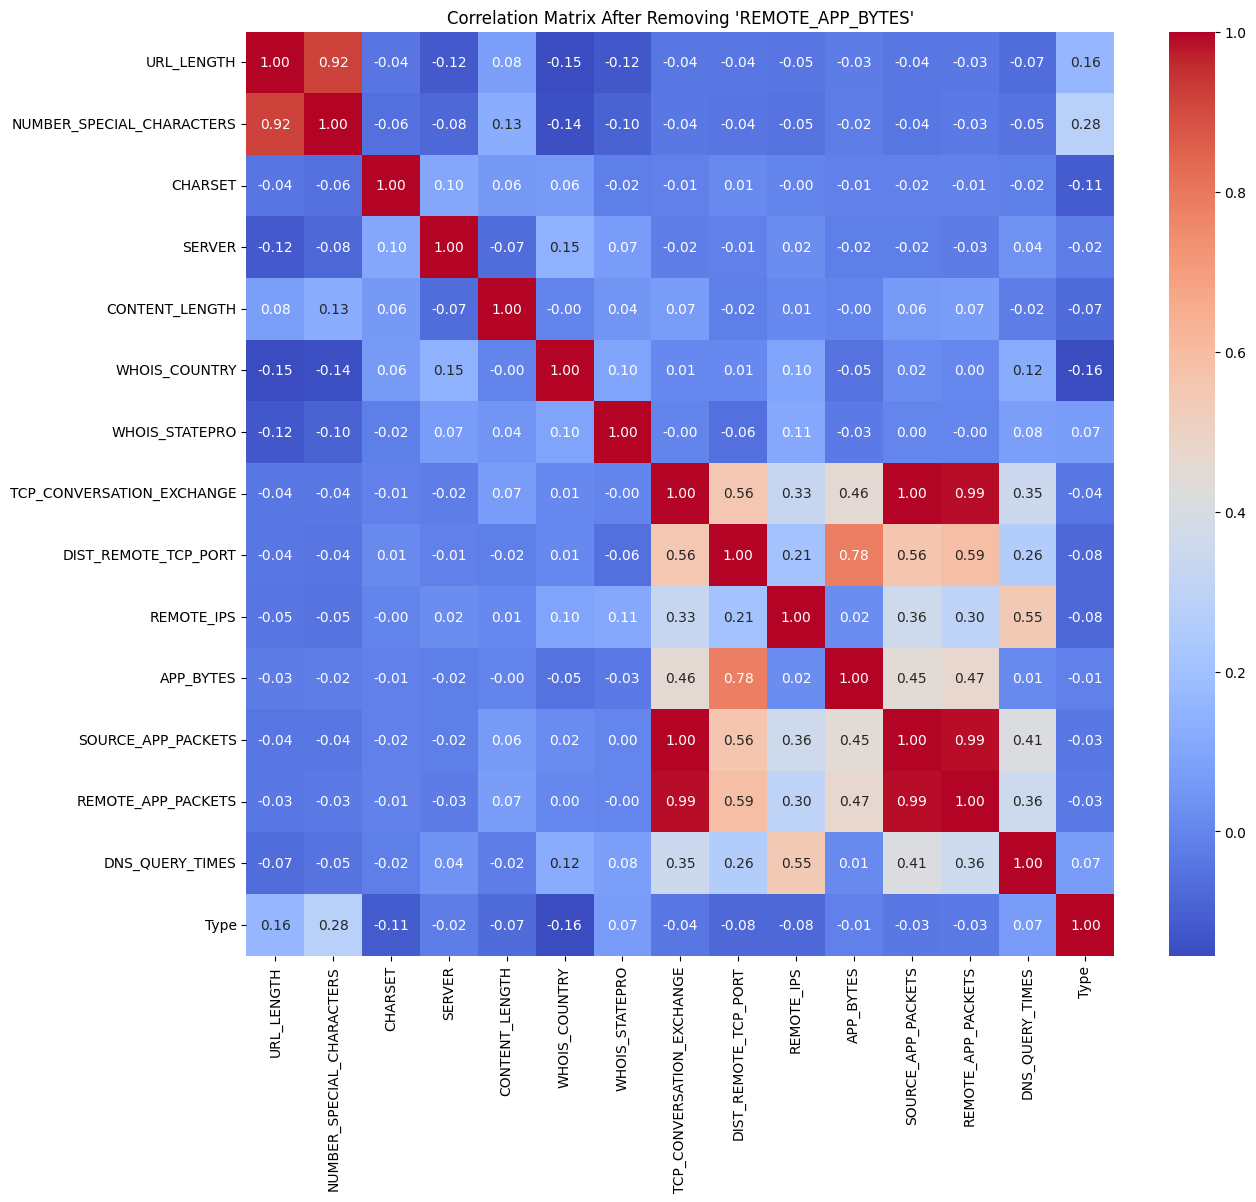

In [16]:
websites_reduced = websites_reduced.drop(columns=['REMOTE_APP_BYTES'])
correlation_matrix_reduced =websites_reduced[numeric_columns.drop(['APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES'])].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_reduced, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix After Removing 'REMOTE_APP_BYTES'")
plt.show()


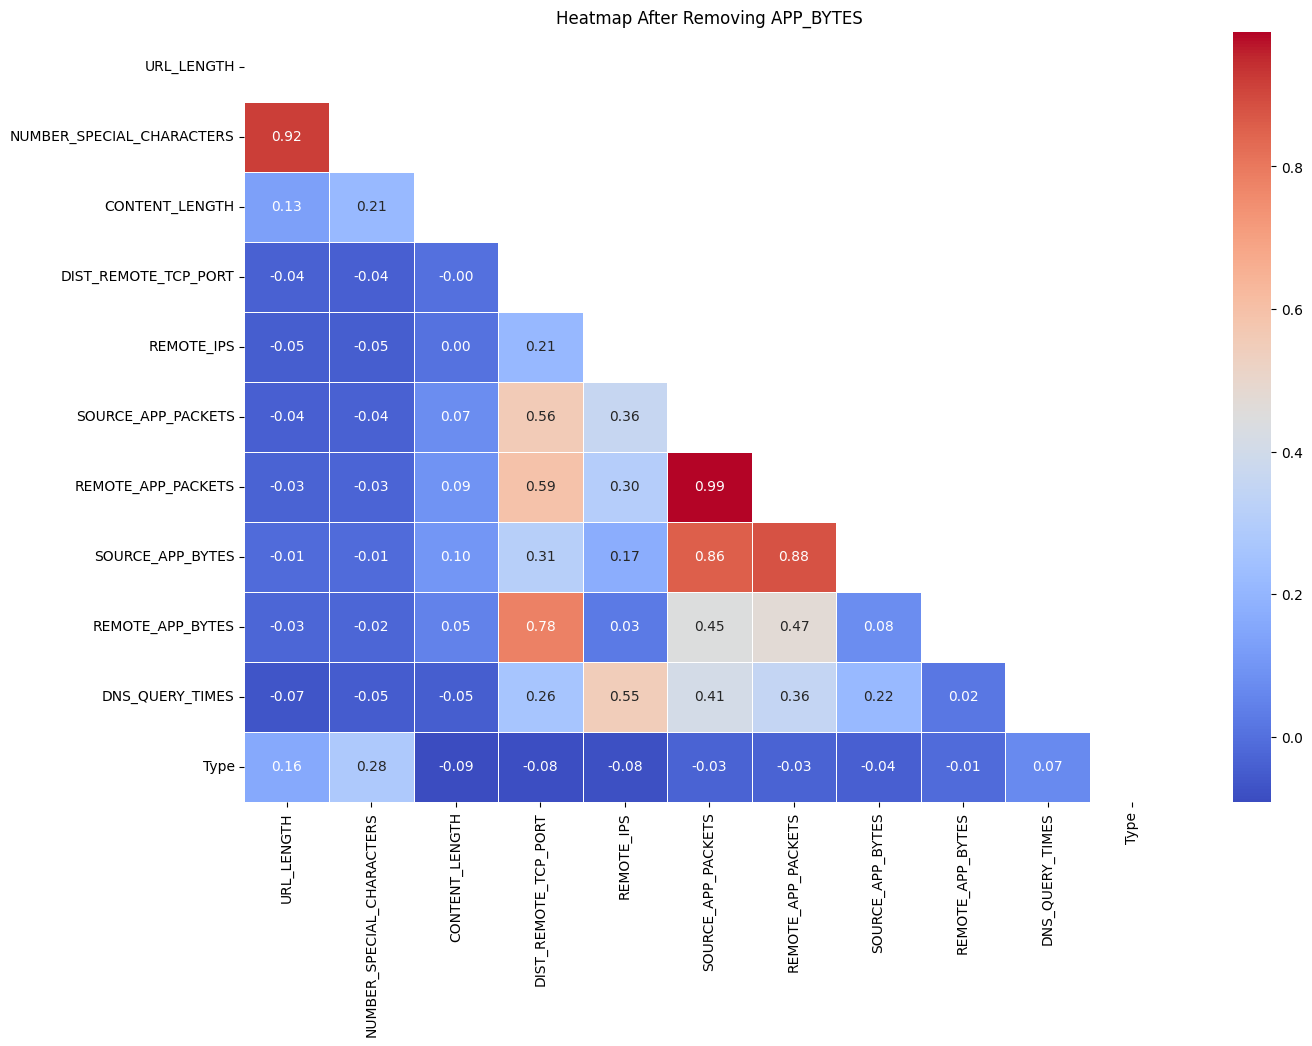

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.039839,-0.046367,-0.042264,-0.033779,-0.014857,-0.026686,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.042619,-0.047103,-0.040096,-0.030597,-0.014376,-0.024098,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,-0.000381,0.004774,0.074142,0.091077,0.100094,0.047595,-0.045644,-0.090852
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,1.000000,0.210188,0.558612,0.591188,0.313359,0.781212,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.210188,1.000000,0.361104,0.304683,0.171651,0.025324,0.548189,-0.078783
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.558612,0.361104,1.000000,0.989285,0.857495,0.447448,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.591188,0.304683,0.989285,1.000000,0.880555,0.470401,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.313359,0.171651,0.857495,0.880555,1.000000,0.075328,0.215285,-0.043852
REMOTE_APP_BYTES,-0.026686,-0.024098,0.047595,0.781212,0.025324,0.447448,0.470401,0.075328,1.000000,0.016215,-0.011004
DNS_QUERY_TIMES,-0.068582,-0.050048,-0.045644,0.259942,0.548189,0.410843,0.355716,0.215285,0.016215,1.000000,0.068753


In [17]:
df_reduced_3 = df_reduced_2.drop(columns=['APP_BYTES'])
correlation_matrix_reduced_3 = df_reduced_3.corr()
plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(correlation_matrix_reduced_3, dtype=bool))
sns.heatmap(correlation_matrix_reduced_3, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, mask=mask)
plt.title('Heatmap After Removing APP_BYTES')
plt.show()

correlation_matrix_reduced_3

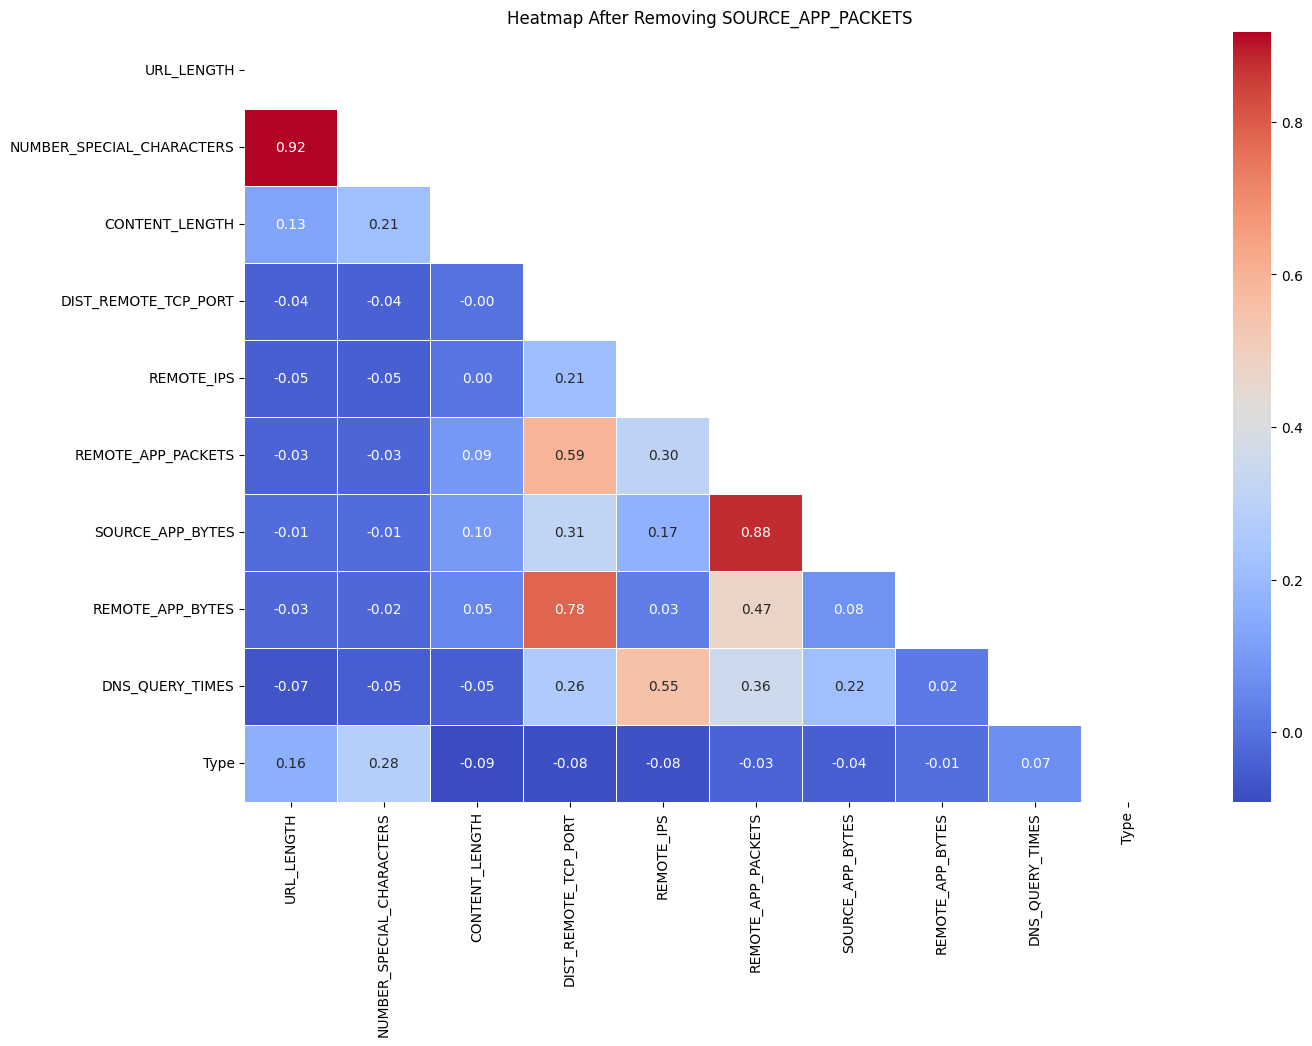

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.039839,-0.046367,-0.033779,-0.014857,-0.026686,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.042619,-0.047103,-0.030597,-0.014376,-0.024098,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,-0.000381,0.004774,0.091077,0.100094,0.047595,-0.045644,-0.090852
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,1.000000,0.210188,0.591188,0.313359,0.781212,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.210188,1.000000,0.304683,0.171651,0.025324,0.548189,-0.078783
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.591188,0.304683,1.000000,0.880555,0.470401,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.313359,0.171651,0.880555,1.000000,0.075328,0.215285,-0.043852
REMOTE_APP_BYTES,-0.026686,-0.024098,0.047595,0.781212,0.025324,0.470401,0.075328,1.000000,0.016215,-0.011004
DNS_QUERY_TIMES,-0.068582,-0.050048,-0.045644,0.259942,0.548189,0.355716,0.215285,0.016215,1.000000,0.068753
Type,0.162104,0.280897,-0.090852,-0.082925,-0.078783,-0.032897,-0.043852,-0.011004,0.068753,1.000000


In [18]:
df_reduced_4 = df_reduced_3.drop(columns=['SOURCE_APP_PACKETS'])
correlation_matrix_reduced_4 = df_reduced_4.corr()

plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(correlation_matrix_reduced_4, dtype=bool))
sns.heatmap(correlation_matrix_reduced_4, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, mask=mask)
plt.title('Heatmap After Removing SOURCE_APP_PACKETS')
plt.show()

correlation_matrix_reduced_4


In [9]:
# Print heatmap again


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [19]:
missing_values = df.isnull().sum()
missing_values


URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [22]:
df['WHOIS_REGDATE'] = pd.to_datetime(df['WHOIS_REGDATE'], errors='coerce')
df['WHOIS_UPDATED_DATE'] = pd.to_datetime(df['WHOIS_UPDATED_DATE'], errors='coerce')

df['WHOIS_REGDATE'].fillna(df['WHOIS_REGDATE'].median(), inplace=True)
df['WHOIS_UPDATED_DATE'].fillna(df['WHOIS_UPDATED_DATE'].median(), inplace=True)

missing_values_after_datetime_imputation = df.isnull().sum()

missing_values_after_datetime_imputation


C:\Users\deivi\AppData\Local\Temp\ipykernel_12824\2426835939.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WHOIS_REGDATE'].fillna(df['WHOIS_REGDATE'].median(), inplace=True)
C:\Users\deivi\AppData\Local\Temp\ipykernel_12824\2426835939.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              1
Type                         0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [26]:
df=websites_reduced
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,3,199,263.0,48,181,2015-10-10 18:21:00,2016-02-09 00:00:00,7,0,2,700,9,10,2.0,1
1,B0_2314,16,6,2,61,15087.0,48,181,1994-01-11 00:00:00,2016-02-09 00:00:00,17,7,4,1230,17,19,0.0,0
2,B0_911,16,6,4,115,324.0,48,181,1994-01-11 00:00:00,2016-02-09 00:00:00,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,1,199,162.0,41,4,1997-07-10 04:00:00,2013-12-09 00:45:00,31,22,3,3812,39,37,8.0,0
4,B0_403,17,6,2,7,124140.0,41,136,1996-12-05 00:00:00,2017-11-04 00:00:00,57,2,5,4278,61,62,4.0,0


In [12]:
# Your comment here

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [13]:
# Examine missing values in each column


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [23]:
unique_countries = df['WHOIS_COUNTRY'].unique()
unique_countries


array(['US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN', 'LU',
       'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE', 'SI',
       'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE',
       'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom', 'BS',
       'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

In [24]:
df['WHOIS_COUNTRY'] = df['WHOIS_COUNTRY'].replace({
    'Cyprus': 'CY',
    'us': 'US',
    'se': 'SE',
    "[u'GB'; u'UK']": 'GB',
    'United Kingdom': 'GB',
    'UK': 'GB',
    'ru': 'RU'
})

unique_countries_consolidated = df['WHOIS_COUNTRY'].unique()

unique_countries_consolidated


array(['US', 'SC', 'GB', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU', 'TH',
       'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT', 'CZ', 'PH',
       'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK', 'UA', 'CH',
       'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['WHOIS_COUNTRY'] = label_encoder.fit_transform(df['WHOIS_COUNTRY'])
df['WHOIS_COUNTRY'].unique(), df.head()



(array([40, 33, 15, 32,  2,  7, 29, 34, 19, 25, 36, 14, 27, 39, 21,  9, 35,
        18, 24,  1, 11, 30,  3, 28, 37, 26, 12, 13,  4, 23, 16, 38,  8,  5,
        31, 20, 10,  6,  0, 17, 41, 22]),
        URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
 0   M0_109          16                          7  iso-8859-1   
 1  B0_2314          16                          6       UTF-8   
 2   B0_911          16                          6    us-ascii   
 3   B0_113          17                          6  ISO-8859-1   
 4   B0_403          17                          6       UTF-8   
 
                   SERVER  CONTENT_LENGTH  WHOIS_COUNTRY WHOIS_STATEPRO  \
 0                  nginx           263.0             40             CA   
 1          Apache/2.4.10         15087.0             40             CA   
 2  Microsoft-HTTPAPI/2.0           324.0             40             CA   
 3                  nginx           162.0             40             AK   
 4                 Apache        

In [26]:
df = df.drop(columns=['URL'])
df['CHARSET'].value_counts()


CHARSET
UTF-8           683
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
windows-1251      1
ISO-8859          1
windows-1252      1
Name: count, dtype: int64

In [27]:
df['CHARSET'] = df['CHARSET'].replace({
    'utf-8': 'UTF-8',
    'iso-8859-1': 'ISO-8859-1',
    'windows-1251': 'Other',
    'ISO-8859': 'Other',
    'windows-1252': 'Other',
    'None': 'Other'
})
df['CHARSET'] = label_encoder.fit_transform(df['CHARSET'])
df['CHARSET'].value_counts(), df['CHARSET'].unique()


(CHARSET
 2    1062
 0     561
 3     155
 1       3
 Name: count, dtype: int64,
 array([0, 2, 3, 1]))

In [28]:
server_counts = df['SERVER'].value_counts()
server_counts


SERVER
Apache                                                       562
nginx                                                        211
Microsoft-HTTPAPI/2.0                                        113
cloudflare-nginx                                              94
Microsoft-IIS/7.5                                             51
                                                            ... 
mw2103.codfw.wmnet                                             1
Apache/2.4.25 (Debian)                                         1
ECD (fll/0790)                                                 1
Apache/2.4.25 (FreeBSD) OpenSSL/1.0.1s-freebsd PHP/5.6.30      1
Apache/2.2.16 (Debian)                                         1
Name: count, Length: 238, dtype: int64

In [29]:
top_10_servers = df['SERVER'].value_counts().nlargest(10).index
df['SERVER'] = df['SERVER'].apply(lambda x: x if x in top_10_servers else 'Other')
df['SERVER'] = label_encoder.fit_transform(df['SERVER'])
df['SERVER'].value_counts(), df['SERVER'].unique()


(SERVER
 1     562
 5     544
 9     211
 3     113
 8      94
 4      51
 2      49
 6      49
 7      42
 10     36
 0      30
 Name: count, dtype: int64,
 array([ 9,  5,  3,  1, 10,  8,  4,  2,  0,  6,  7]))

In [30]:
whois_statepro_counts = df['WHOIS_STATEPRO'].value_counts()
whois_statepro_counts


WHOIS_STATEPRO
CA            734
NY             75
WA             65
Barcelona      62
FL             61
             ... 
Vic             1
New Jersey      1
Alicante        1
SK              1
Paris           1
Name: count, Length: 181, dtype: int64

In [31]:
top_10_statepro = df['WHOIS_STATEPRO'].value_counts().nlargest(10).index
df['WHOIS_STATEPRO'] = df['WHOIS_STATEPRO'].apply(lambda x: x if x in top_10_statepro else 'Other')
df['WHOIS_STATEPRO'] = label_encoder.fit_transform(df['WHOIS_STATEPRO'])
df['WHOIS_STATEPRO'].value_counts(), df['WHOIS_STATEPRO'].unique()


(WHOIS_STATEPRO
 2     734
 8     565
 6      75
 10     65
 1      62
 4      61
 0      58
 3      57
 7      45
 5      30
 9      29
 Name: count, dtype: int64,
 array([ 2,  8,  4,  0,  6,  7,  3, 10,  9,  5,  1]))

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [16]:
# Your code here


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [33]:
df_cleaned = df.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'])
df_cleaned.head()



,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,0,9,263.0,40,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,2,5,15087.0,40,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,3,3,324.0,40,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,0,9,162.0,40,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,2,1,124140.0,40,57,2,5,4278,61,62,129889,4586,61,4.0,0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,0,9,263.0,40,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,2,5,15087.0,40,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,3,3,324.0,40,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,0,9,162.0,40,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,2,1,124140.0,40,57,2,5,4278,61,62,129889,4586,61,4.0,0


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [19]:
# Your code here


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [34]:
charset_counts = df_cleaned['CHARSET'].value_counts()
charset_counts


CHARSET
2    1062
0     561
3     155
1       3
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [36]:
original_df = pd.read_csv('../data/website.csv')
df_cleaned['SERVER'] = original_df['SERVER']
df_cleaned['SERVER'] = df_cleaned['SERVER'].apply(
    lambda x: 'Microsoft' if 'Microsoft' in str(x) else ('Apache' if 'Apache' in str(x) else ('nginx' if 'nginx' in str(x) else 'Other'))
)

# Verify the transformation
server_counts_after_relabel = df_cleaned['SERVER'].value_counts()
server_counts_after_relabel


SERVER
Apache       643
Other        505
nginx        435
Microsoft    198
Name: count, dtype: int64

![Think Hard](../images/think-hard.jpg)

In [24]:
# Your comment here


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [37]:
df_cleaned['SERVER'] = label_encoder.fit_transform(df_cleaned['SERVER'])
df_cleaned['SERVER'].value_counts(), df_cleaned['SERVER'].unique()

(SERVER
 0    643
 2    505
 3    435
 1    198
 Name: count, dtype: int64,
 array([3, 0, 1, 2]))

In [26]:
# Count `SERVER` value counts here


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [38]:
website_dummy = pd.get_dummies(df_cleaned, columns=['CHARSET', 'SERVER', 'WHOIS_COUNTRY'])
website_dummy.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,WHOIS_COUNTRY_32,WHOIS_COUNTRY_33,WHOIS_COUNTRY_34,WHOIS_COUNTRY_35,WHOIS_COUNTRY_36,WHOIS_COUNTRY_37,WHOIS_COUNTRY_38,WHOIS_COUNTRY_39,WHOIS_COUNTRY_40,WHOIS_COUNTRY_41
0,16,7,263.0,7,0,2,700,9,10,1153,...,False,False,False,False,False,False,False,False,True,False
1,16,6,15087.0,17,7,4,1230,17,19,1265,...,False,False,False,False,False,False,False,False,True,False
2,16,6,324.0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,17,6,162.0,31,22,3,3812,39,37,18784,...,False,False,False,False,False,False,False,False,True,False
4,17,6,124140.0,57,2,5,4278,61,62,129889,...,False,False,False,False,False,False,False,False,True,False


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [39]:
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1781 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 2   CONTENT_LENGTH             1781 non-null   float64
 3   TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 4   DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 5   REMOTE_IPS                 1781 non-null   int64  
 6   APP_BYTES                  1781 non-null   int64  
 7   SOURCE_APP_PACKETS         1781 non-null   int64  
 8   REMOTE_APP_PACKETS         1781 non-null   int64  
 9   SOURCE_APP_BYTES           1781 non-null   int64  
 10  REMOTE_APP_BYTES           1781 non-null   int64  
 11  APP_PACKETS                1781 non-null   int64  
 12  DNS_QUERY_TIMES            1780 non-null   float64
 13  Type                       1781 non-null   int64

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [57]:
X.dropna()
X_train.dropna()
X_test.dropna()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,WHOIS_COUNTRY_32,WHOIS_COUNTRY_33,WHOIS_COUNTRY_34,WHOIS_COUNTRY_35,WHOIS_COUNTRY_36,WHOIS_COUNTRY_37,WHOIS_COUNTRY_38,WHOIS_COUNTRY_39,WHOIS_COUNTRY_40,WHOIS_COUNTRY_41
824,48,11,2516.0,24,0,2,4041,30,25,12420,...,False,False,False,False,False,False,False,False,True,False
1470,78,13,1853.0,39,35,2,5949,47,47,32891,...,False,False,False,False,False,False,False,False,True,False
233,33,7,1853.0,4,3,2,420,4,5,304,...,False,False,False,False,False,False,False,False,True,False
798,47,12,1853.0,29,20,8,4167,33,33,3181,...,False,False,False,False,False,False,False,False,True,False
777,46,10,1853.0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,47,9,675.0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
532,40,9,1853.0,16,11,2,2272,20,26,16035,...,False,False,False,False,False,False,False,False,True,False
381,38,8,1853.0,18,0,1,1458,20,20,19623,...,False,False,False,False,False,False,False,False,True,False
844,48,11,1853.0,8,7,6,684,8,11,696,...,False,False,False,False,False,False,False,False,True,False


In [58]:
from sklearn.model_selection import train_test_split

X = website_dummy.drop(columns=['Type'])
y = website_dummy['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((1424, 63), (357, 63), (1424,), (357,))

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [59]:
X = website_dummy.drop(columns=['Type'])
y = website_dummy['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix, accuracy

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

What are your thoughts on the performance of the model? Write your conclusions below.

In [33]:
# Your conclusions here:



#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [34]:
# Your code here:



To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [35]:
# Your code here:



#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [36]:
# Your code here:



Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
y_pred_knn3 = knn3.predict(X_test)

conf_matrix_knn3 = confusion_matrix(y_test, y_pred_knn3)
accuracy_knn3 = accuracy_score(y_test, y_pred_knn3)

conf_matrix_knn3, accuracy_knn3




ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [38]:
# Your code here